In [234]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pylab as pl

In [235]:
x = cp.Variable()
y = cp.Variable()

objective = cp.Minimize((x - 5) ** 2 + (y - 10) ** 2)

# Inequality Constraints: >= (Convex)
# Equality Constraints: == (Linear)
constraints = [x >= 10, x + y >= 25]

problem = cp.Problem(objective, constraints)

In [236]:
result = problem.solve()

print('Optimal Value of x', x.value)
print('Optimal Value of y', y.value)
print('Value of f when variables are optimised', result)

Optimal Value of x 10.0
Optimal Value of y 15.0
Value of f when variables are optimised 50.0


In [237]:
# Formalize convex optimization using matrices
# Especially suitable for bigger Convex problems
# Lot of inequality,  equality constraints and a complex objective function
z = cp.Variable((2, 1))

Q = np.array([
    [1, 0],
    [0, 1]
])

# Quadratic Form: min zTQz (x, y)T @ Q @ (x, y)                                                                                        
objective = cp.Minimize(cp.QuadForm(z, Q))

# A @ z >= b
A = np.array([1, 0])
b = np.array([3])

# C @ z == d
C = np.array([1, 1])
d = np.array([5])

constraints = [A @ z >= b, C @ z == d]

problem = cp.Problem(objective, constraints)

In [238]:
result = problem.solve()

print('x:', z.value[0])
print('y:', z.value[1])

x: [3.]
y: [2.]


In [391]:
def newt(func, phi, t=1, num_of_iterations=100, tolerance=1e-5, initial_estimate=np.array([30]), alpha=1, beta=.9):
    def function(x, t):
        return func(x) + 1 / t * phi(x)

    def function_der(x_var, h=1e-5):
        return np.array([
            (function(x_var + h, t) - function(x_var - h, t)) / (2 * h)
        ])

    def function_der_2(x_var, h=1e-5):
        return np.array([
            (function(x_var + h, t) - 2 * function(x_var, t) + function(x_var - h, t)) / h ** 2
        ])

    def get_x_k_plus_1(x_vector):
        return x_k - alpha * (function_der(x_vector[0]) / function_der_2(x_vector[0]))

    # My newton method Implementation
    pts_visited = []
    x_k = initial_estimate
    for k in range(num_of_iterations):
        x_k_plus_1 = get_x_k_plus_1(x_k)
        while not np.isfinite(function(x_k_plus_1[0], t)).all():
            alpha *= beta
            x_k_plus_1 = get_x_k_plus_1(x_k)
        pts_visited.append(x_k)
        if np.linalg.norm(function_der(x_k_plus_1[0])) < tolerance:
            break
        x_k = x_k_plus_1
    return x_k, pts_visited

In [395]:
def interior_point(f, phi, mu=2, num_of_iterations=100, tolerance=1e-10, initial_estimate=np.array([30])):
    visited_points = []
    x_k = initial_estimate
    t = 1
    for i in range(num_of_iterations):
        # My Newton Method Implementation
        x_k_plus_1, vis_p = newt(f, phi, t=t, initial_estimate=x_k, tolerance=tolerance, alpha=.001)
        if np.linalg.norm(x_k - x_k_plus_1) < tolerance:
            return x_k, visited_points
        visited_points.append(x_k)
        x_k = x_k_plus_1
        t *= mu
    return x_k, visited_points

In [437]:
def f(x): return (x - 5) ** 2


G = np.array([
    [-1],
])
h = np.array([-10])


def phi(x):
    x_vec = np.array([x])
    g_values = G @ x_vec - h
    if np.any(g_values >= 0):
        return np.inf
    return -np.sum(np.log(-g_values))


result, visited_points = interior_point(f, phi, tolerance=1e-5, num_of_iterations=10, initial_estimate=np.array([15]))

print('result x:', format(result[0], '.5f'), 'num of iterations:', len(visited_points))

result x: 10.00125 num of iterations: 10


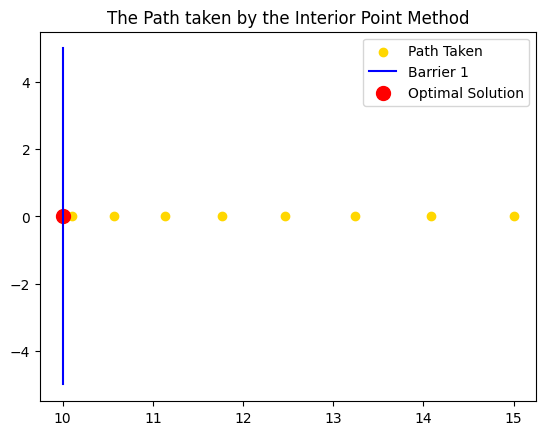

In [438]:
visited_points = np.array(visited_points)
y_1 = np.linspace(-5, 5, 100)
x_1 = [10 for e in y_1]

plt.scatter(visited_points, [0 for e in range(len(visited_points))], color='gold')
plt.plot(x_1, y_1, color='blue')
plt.scatter(10, 0, color='red', s=100)
plt.legend(['Path Taken', 'Barrier 1', 'Optimal Solution'])
plt.title('The Path taken by the Interior Point Method')
plt.show()

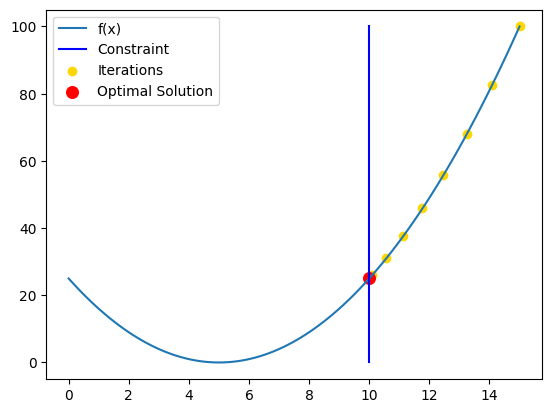

In [439]:
x = np.linspace(0, 15, 100)
y = f(x)

y_1 = np.linspace(0, 100, 100)
x_1 = [10 for e in y_1]

plt.plot(x, y)
plt.plot(x_1, y_1, color='blue')
plt.scatter(visited_points, f(visited_points), color='gold')
plt.scatter(10, f(10), color='red', s=70)
plt.legend(['f(x)', 'Constraint', 'Iterations', 'Optimal Solution'])
plt.show()

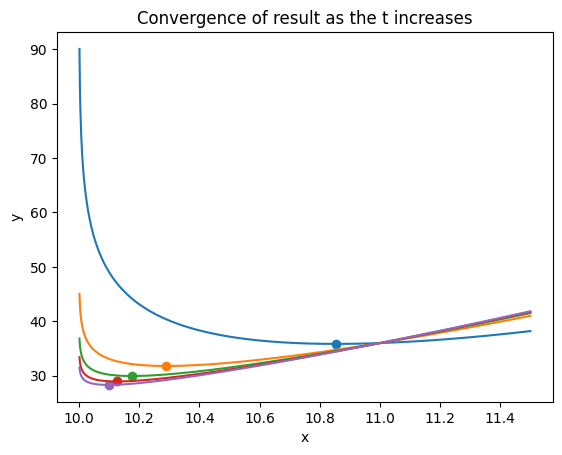

In [467]:
# Now lets have a look at the barrier function
def barrier_function(x, t):
    return f(x) + 1/t * phi(x)


x = np.linspace(10, 11.5, 1000)
    
for i in np.linspace(.1, 1, 5):
    y = []
    for num in x:
        y.append(barrier_function(num, i))
    plt.plot(x, y)
    r, _ = newt(f, phi, t=i)
    plt.scatter(r, barrier_function(r, i))
    
plt.title('Convergence of result as the t increases')
plt.xlabel('x')
plt.ylabel('y')
plt.show()